**The goal of this project is to build basic ML models that will predict what is the specie of a plant based on its sepal & petal dimensions. The dataset we will use is the famous Iris dataset from the University Of California. It is a small dataset that does not require lot of data exploration, data cleaning and feature engineering.**

First we import packages

In [249]:
#import first packages
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import seaborn as sn
import subprocess

def install(name):
    subprocess.check_call(['pip3', '--no-cache-dir', 'install', name])

install('scikit-learn')

#import remaining packages
import sklearn

Then we import data and makes minor changes

In [250]:
#import iris dataset
data = pd.read_csv("iris.csv")

#defining all the conditions inside a function
def condition(x):
    if x == "Iris-versicolor":
        return 1
    elif x == "Iris-setosa":
        return 2
    else:
        return 3

#apply conditions
data['SpeciesInt'] = data['Species'].apply(condition)

#drop useless columns
data = data.drop(columns = ['Id','Species'])

The next step is to explore the dataset. Since the dataset is very basic it does not take lot of time.

In [251]:
#summary dataset for basic data exploration
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesInt
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


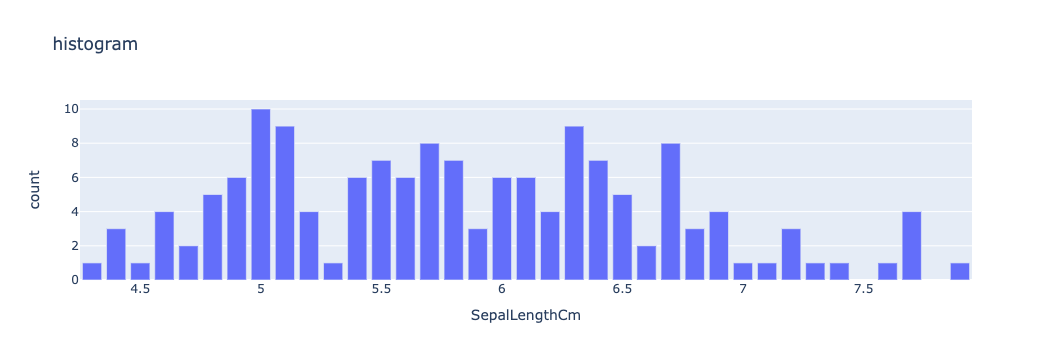

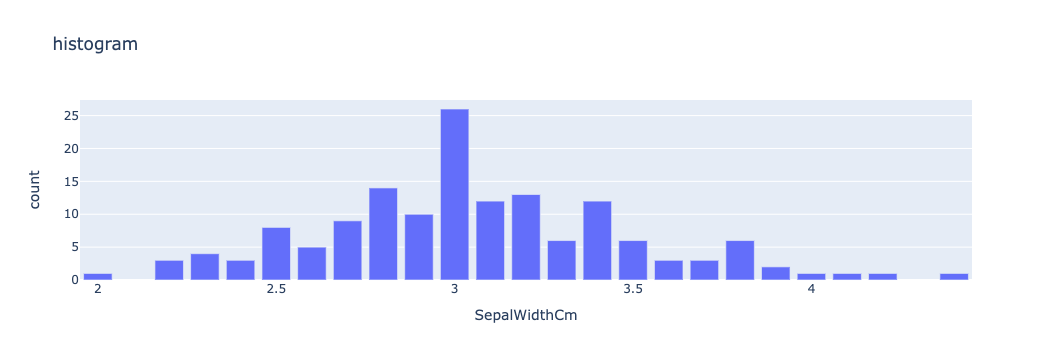

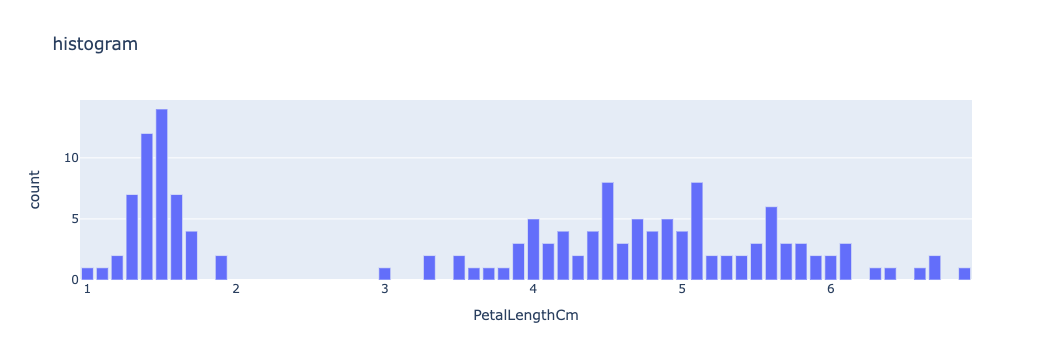

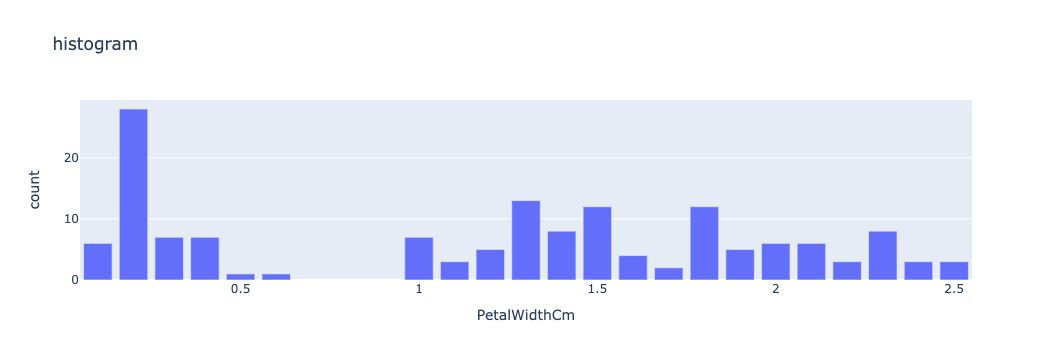

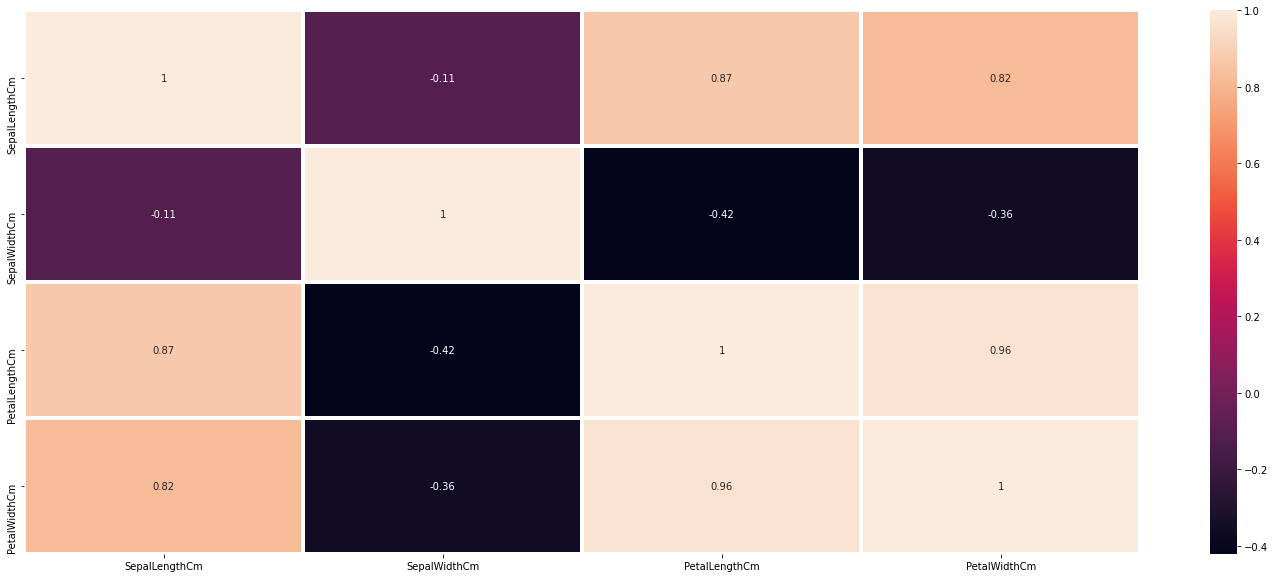

In [252]:
#exploratory analysis 
for col in ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']:
    
    data_grouped = data.groupby(by=[col]).count()['SpeciesInt'].reset_index()

    py.offline.init_notebook_mode(connected=True)

    trace1 = go.Bar(
        x= data_grouped[col],
        y= data_grouped['SpeciesInt'],
        name='Histogram')

    data_trace = trace1
    
    layout = go.Layout(
        barmode='group',
        showlegend=False,
        title='histogram',
        yaxis=dict(
        title='count'
        ),
        xaxis=dict(
        title= col
        )
    )

    fig = go.Figure(data=data_trace, layout=layout)
    py.offline.iplot(fig)

#correlation matrix 
data_corr = data.drop(columns = 'SpeciesInt')
corrMatrix = data_corr.corr()
plt.figure(figsize = (25,10))
sn.heatmap(corrMatrix, annot=True, linewidths=2.5)
plt.show()

Feature engineering is not needed as all the features of the datasets are numbers without null values.
We separate features and predicted values.

In [260]:
X = data.drop(columns = 'SpeciesInt')
y = data['SpeciesInt']

We train multiple basic ML models on X data and we look at which one perform the best.

In [254]:
#train dataset with random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
rf.fit(X,y)
y_pred = rf.predict(X)

In [255]:
#accuracy of the model
cm = confusion_matrix(y, y_pred)
print(cm)

[[49  0  1]
 [ 0 50  0]
 [ 0  0 50]]


In [256]:
#train dataset with logistics regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)

In [257]:
#accuracy of the model
cm = confusion_matrix(y, y_pred)
print(cm)

[[47  0  3]
 [ 0 50  0]
 [ 1  0 49]]


In [262]:
#train dataset with Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)

In [263]:
#accuracy of the model
cm = confusion_matrix(y, y_pred)
print(cm)

[[47  0  3]
 [ 0 50  0]
 [ 3  0 47]]


Random Forest gives the best results.